In [59]:
import pandas as pd
import shapely
import numpy as np
% matplotlib inline

In [60]:
pwd

u'/Users/lexu/Downloads'

In [ ]:
df = pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-08.csv')

In [ ]:
df.head()

## get the ct & get the point of lat and long

In [ ]:
from geopandas import GeoDataFrame
shape_path="CT_Shape/ct_shape.shp"
ct_shape = GeoDataFrame.from_file(shape_path)
ct_shape.index=ct_shape.BoroCT2010

In [ ]:
type(ct_shape)

In [ ]:
df['lonlat']=zip(df.Dropoff_longitude,df.Dropoff_latitude)
df['point']=df[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
df.head()

In [23]:
index_rand = np.random.choice(df.index,1000, replace=True)

In [24]:
df_drop_rand = df.iloc[index_rand]

In [25]:
df_drop_rand.index = range(1000)

In [27]:
ct_shape.BoroCT2010 = ct_shape.BoroCT2010.astype(str)

In [29]:
from fiona.crs import from_epsg
ct_shape.crs = from_epsg(4326) # epsg=4326: lat/on | 26918: NAD83/UTM zone 18N | epsg=2263 is US feet
NYC_Area=ct_shape.to_crs(epsg=2263).geometry.area.sum()/(2.788*10**7) # from ft2 to mi2 
print('total NYC land area: %s (mi^2)'%str(NYC_Area)[:5]) # from ft2 to mi2 #epsg=2263 is US feet

total NYC land area: 302.3 (mi^2)


In [31]:
a=[]

for i in range(len(df_drop_rand)):
    a.append(ct_shape[ct_shape.geometry.intersects(df_drop_rand.iloc[i].geometry)].BoroCT2010.values)
    print '\r',"%",str((i+1)*100./len(df_drop_rand))[:4],
    
df_drop_rand['BoroCT2010']=a

% 100.


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:
ct_shape.head()

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,Shape_Leng,geometry
BoroCT2010,,,,,,,,,,,,
5000900,5000900,5,Staten Island,I,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016729,POLYGON ((-74.07920577013245 40.64343078374566...
5012500,5012500,5,Staten Island,I,012500,125,SI22,West New Brighton-New Brighton-St. George,3903,4.954936e+06,10582.855530,POLYGON ((-74.11618948747538 40.62894119691981...
5013301,5013301,5,Staten Island,E,013301,133.01,SI22,West New Brighton-New Brighton-St. George,3903,7.217847e+05,3428.312676,POLYGON ((-74.11719947139957 40.63456809812987...
5019700,5019700,5,Staten Island,I,019700,197,SI07,Westerleigh,3903,3.231720e+06,9097.697226,POLYGON ((-74.13122302263596 40.61726518212697...
5002002,5002002,5,Staten Island,I,002002,20.02,SI14,Grasmere-Arrochar-Ft. Wadsworth,3902,8.501224e+06,12591.725901,"POLYGON ((-74.0635056566019 40.60215005483046,..."


In [33]:
df_drop_rand.BoroCT2010 = df_drop_rand.BoroCT2010.apply(lambda x: str(x)[2:-2])

In [15]:
df_drop_rand

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,lonlat,geometry,BoroCT2010
0,2,2015-08-03 12:51:08,2015-08-03 12:57:47,N,1,-73.947739,40.815010,-73.960297,40.807995,1,...,1.82,0.00,NaN,0.3,9.12,1,1.0,"(-73.9602966309, 40.8079948425)",POINT (-73.96029663085938 40.8079948425293),1020300
1,2,2015-08-06 22:39:55,2015-08-06 22:42:16,N,1,-73.945190,40.808037,-73.948715,40.812378,1,...,0.00,0.00,NaN,0.3,5.30,2,1.0,"(-73.94871521, 40.8123779297)",POINT (-73.94871520996094 40.8123779296875),1022400
2,2,2015-08-09 14:09:17,2015-08-09 14:16:41,N,1,-73.921722,40.766651,-73.935997,40.749859,1,...,3.00,0.00,NaN,0.3,11.30,1,1.0,"(-73.9359970093, 40.7498588562)",POINT (-73.93599700927734 40.74985885620117),4003300
3,1,2015-08-16 12:46:53,2015-08-16 12:52:36,Y,1,-73.954094,40.806293,-73.940117,40.805557,1,...,2.00,0.00,NaN,0.3,8.80,1,1.0,"(-73.9401168823, 40.805557251)",POINT (-73.94011688232422 40.80555725097656),1019800
4,2,2015-08-31 20:06:08,2015-08-31 20:06:11,N,5,-73.937141,40.791912,-73.937141,40.791920,1,...,3.39,0.00,NaN,0.0,14.69,1,2.0,"(-73.9371414185, 40.7919197083)",POINT (-73.93714141845702 40.79191970825195),1016200
5,2,2015-08-07 23:50:03,2015-08-07 23:55:52,N,1,-73.942581,40.794579,-73.945251,40.807903,1,...,0.00,0.00,NaN,0.3,7.80,2,1.0,"(-73.9452514648, 40.8079032898)",POINT (-73.94525146484375 40.80790328979492),1020000
6,2,2015-08-23 20:50:22,2015-08-23 21:09:27,N,1,-73.994804,40.702847,-73.954178,40.743504,1,...,0.00,0.00,NaN,0.3,21.30,2,1.0,"(-73.9541778564, 40.7435035706)",POINT (-73.95417785644531 40.74350357055664),4000700
7,2,2015-08-26 22:48:47,2015-08-26 22:49:16,N,1,-73.943199,40.816303,-73.943977,40.815117,1,...,0.00,0.00,NaN,-0.3,-3.80,3,1.0,"(-73.943977356, 40.8151168823)",POINT (-73.94397735595702 40.81511688232422),1022800
8,2,2015-08-07 08:51:36,2015-08-07 09:02:54,N,1,-73.867607,40.852512,-73.883461,40.834076,6,...,0.00,0.00,NaN,0.3,11.80,2,1.0,"(-73.8834609985, 40.8340759277)",POINT (-73.88346099853516 40.83407592773438),2016100
9,1,2015-08-26 12:26:12,2015-08-26 12:37:17,N,1,-73.976677,40.682812,-73.967957,40.693199,1,...,0.00,0.00,NaN,0.3,9.80,2,1.0,"(-73.967956543, 40.6931991577)",POINT (-73.96795654296875 40.69319915771485),3019500


In [37]:
ct_shape = GeoDataFrame.merge(ct_shape, df_drop_rand, on = "BoroCT2010", how = "inner")

In [17]:
ct_shape = ct_shape.merge(df_drop_rand, on = "BoroCT2010", how = "inner")

In [42]:
type(ct_shape)

geopandas.geodataframe.GeoDataFrame

In [41]:
ct_shape = GeoDataFrame(ct_shape)

AttributeError: No geometry data set yet (expected in column 'geometry'.

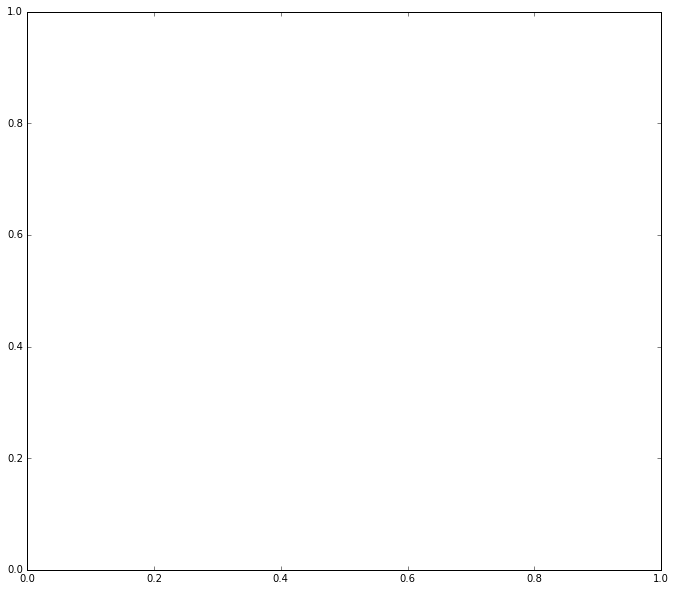

In [52]:
import matplotlib.pylab as plt
f = plt.figure(figsize=(25,10))
ax = f.add_subplot(121)
ct_shape.plot( alpha=0.5, linewidth=0.1, ax=ax, cmap='hot')
#ax.set_title("Tip percentage")
plt.legend()

In [55]:
ct_shape.geometry_x

0      POLYGON ((-73.97990650235904 40.72686577300233...
1      POLYGON ((-73.9776548272757 40.75791142377995,...
2      POLYGON ((-73.9776548272757 40.75791142377995,...
3      POLYGON ((-73.96432543478758 40.75638153099089...
4      POLYGON ((-73.96432543478758 40.75638153099089...
5      POLYGON ((-73.96802436915853 40.75957814005281...
6      POLYGON ((-73.97124277307127 40.76093641847906...
7      POLYGON ((-73.97124277307127 40.76093641847906...
8      POLYGON ((-73.97445730616322 40.76229308352502...
9      POLYGON ((-73.97445730616322 40.76229308352502...
10     POLYGON ((-73.97301487242221 40.76427887944536...
11     POLYGON ((-73.96980028891755 40.76291351212782...
12     POLYGON ((-73.96980028891755 40.76291351212782...
13     POLYGON ((-73.98411754823196 40.75484205346461...
14     POLYGON ((-73.95816437040028 40.77886120010729...
15     POLYGON ((-73.95816437040028 40.77886120010729...
16     POLYGON ((-73.94796768189836 40.77880646598425...
17     POLYGON ((-73.9539837022

In [57]:
ct_shape.rename({'geometry_x' : 'geometry'})

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,...,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,lonlat,geometry_y
0,1003200,1,Manhattan,I,003200,32,MN22,East Village,3809,2.334190e+06,...,0.5,4.55,0.0,NaN,0.3,27.35,1,1.0,"(-73.9842910767, 40.7256355286)",POINT (-73.98429107666014 40.72563552856445)
1,1009600,1,Manhattan,E,009600,96,MN17,Midtown-Midtown South,3807,1.887288e+06,...,0.5,3.46,0.0,NaN,0.3,20.76,1,1.0,"(-73.9803924561, 40.7546806335)",POINT (-73.98039245605469 40.75468063354492)
2,1009600,1,Manhattan,E,009600,96,MN17,Midtown-Midtown South,3807,1.887288e+06,...,0.5,4.46,0.0,NaN,0.3,26.76,1,1.0,"(-73.9826507568, 40.7568359375)",POINT (-73.98265075683594 40.7568359375)
3,1009800,1,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,...,0.5,3.08,0.0,NaN,0.3,15.38,1,1.0,"(-73.9646530151, 40.7564697266)",POINT (-73.96465301513672 40.7564697265625)
4,1009800,1,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,...,0.5,2.20,0.0,NaN,0.3,25.00,1,1.0,"(-73.9658432007, 40.756980896)",POINT (-73.96584320068358 40.75698089599609)
5,1010000,1,Manhattan,I,010000,100,MN19,Turtle Bay-East Midtown,3808,1.860938e+06,...,0.5,6.70,0.0,NaN,0.3,33.50,1,1.0,"(-73.9701843262, 40.7595481873)",POINT (-73.97018432617188 40.75954818725585)
6,1010200,1,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,...,0.5,0.00,0.0,NaN,0.3,21.30,2,1.0,"(-73.9760284424, 40.7573013306)",POINT (-73.97602844238281 40.75730133056641)
7,1010200,1,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,...,0.5,0.00,0.0,NaN,0.3,9.30,2,1.0,"(-73.975151062, 40.7613296509)",POINT (-73.97515106201173 40.76132965087891)
8,1010400,1,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,...,0.5,3.75,0.0,NaN,0.3,22.55,1,1.0,"(-73.9785842896, 40.7618255615)",POINT (-73.97858428955078 40.76182556152344)
9,1010400,1,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,...,0.5,0.00,0.0,NaN,0.3,23.30,2,1.0,"(-73.9774932861, 40.7626953125)",POINT (-73.97749328613281 40.7626953125)


In [44]:
c

,BoroCT2010,BoroCode,BoroName,CDEligibil,CT2010,CTLabel,NTACode,NTAName,PUMA,Shape_Area,...,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,lonlat,geometry_y
0,1003200,1,Manhattan,I,003200,32,MN22,East Village,3809,2.334190e+06,...,0.5,4.55,0.0,NaN,0.3,27.35,1,1.0,"(-73.9842910767, 40.7256355286)",POINT (-73.98429107666014 40.72563552856445)
1,1009600,1,Manhattan,E,009600,96,MN17,Midtown-Midtown South,3807,1.887288e+06,...,0.5,3.46,0.0,NaN,0.3,20.76,1,1.0,"(-73.9803924561, 40.7546806335)",POINT (-73.98039245605469 40.75468063354492)
2,1009600,1,Manhattan,E,009600,96,MN17,Midtown-Midtown South,3807,1.887288e+06,...,0.5,4.46,0.0,NaN,0.3,26.76,1,1.0,"(-73.9826507568, 40.7568359375)",POINT (-73.98265075683594 40.7568359375)
3,1009800,1,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,...,0.5,3.08,0.0,NaN,0.3,15.38,1,1.0,"(-73.9646530151, 40.7564697266)",POINT (-73.96465301513672 40.7564697265625)
4,1009800,1,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,...,0.5,2.20,0.0,NaN,0.3,25.00,1,1.0,"(-73.9658432007, 40.756980896)",POINT (-73.96584320068358 40.75698089599609)
